In [1]:
import MCMC as MCSZ
import numpy as np
import corner
import matplotlib.pyplot as plt
import pandas as pd
import time
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import sys
import csv

In [2]:
#Specify fiducial values (Should be same as from sim_script)

#Galaxy cluster parameters
y = 1.8e-5
electron_temperature = 5.0 #KeV
tau = MCSZ.y_to_tau(y,electron_temperature)
peculiar_vel = 0 #km/s
betac = peculiar_vel/(3e5)

#SIDES model values
amp_sides = 1
b_sides = 1

labels = ('y','temperature','betac','amp_sides','b_sides')
theta = (y, electron_temperature, betac, amp_sides, b_sides)

In [3]:
# Read simulation output, change directory 
df = pd.read_csv('/data/bolocam/bolocam/erapaport/mcmc_run_016',header=None) 
data = df.to_numpy()

In [4]:
np.shape(data)

(320001, 5)

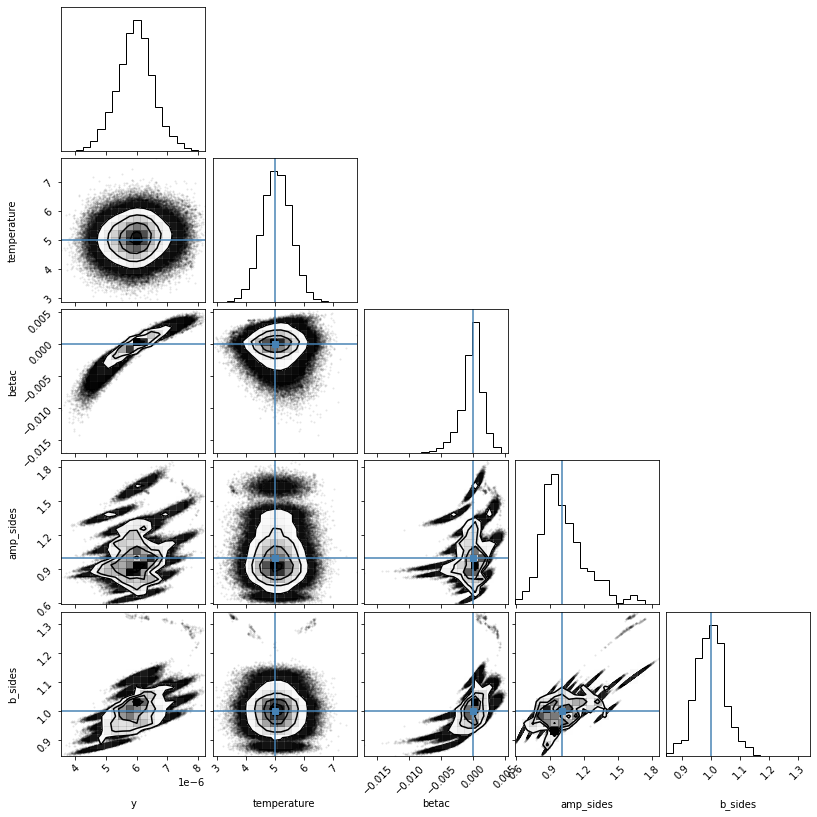

In [5]:
#Plot contour plot
fig = corner.corner(
    data[1:,:], labels=labels, truths=theta, smooth = 0
);

In [15]:
for i in range(31):
    print(i)
    print(np.mean(new_data[8000*(i)+1:8000*(i+1)+1,2]))

0
0.0010601461868582982
1
0.00035650275161385635
2
0.0014593946656758137
3
8.904549354489848e-05
4
-0.0007151884331333876
5
-5.4771295925871875e-05
6
0.00047198282426393567
7
0.001428149012278655
8
-0.0007939723123455801
9
0.001322568109227282
10
-9.952008728905337e-05
11
-0.00032139432667361017
12
-1.581873222088201e-05
13
-0.0020029822304507344
14
-0.000672118844347288
15
0.00022443464006357706
16
-0.0013545131149085596
17
-0.002057531146105717
18
-0.0019710526395259735
19
-0.0003599211414784556
20
-0.0004330001946440043
21
0.00020141894269438276
22
-0.00022123279927401912
23
-0.002721232217476392
24
0.000712593789040006
25
-0.0002887923256347815
26
0.0011934587847421691
27
-0.00037576963425797305
28
-0.0002265447936178037
29
0.0010828753799054969
30
-0.00123500011693885


In [13]:
for i in range(20):
    print(i+20)
    print(np.mean(data[8000*(i+20)+1:8000*(i+20+1)+1,3]))

20
1.1678560672558842
21
0.6685115925248115
22
0.9056978097558124
23
1.6343432469928352
24
0.9664860950517495
25
0.8302450461997168
26
1.0277998656304106
27
0.8260583423929886
28
0.9140283768258856
29
0.9147978787657182
30
1.2949277006287532
31
0.9812024336158829
32
0.9624980500520972
33
1.0291815007235967
34
1.0412934963059735
35
1.1405802641841778
36
1.2855577981510695
37
0.906826861885821
38
0.8048135206640736
39
0.8818365324900328


In [6]:
bad_indices = [0,4,9,13,21,23,30,35,36]
bad_indices = [0,3,7,10,17,18,24,28,28] #manual modification

In [7]:
new_data = data[1:,:]

In [8]:
np.shape(new_data)

(320000, 5)

In [9]:
for i in range(len(bad_indices)):
    new_data = np.concatenate((new_data[:8000*(bad_indices[i]),:],new_data[8000*((bad_indices[i])+1):,:]),axis=0)

In [10]:
np.shape(new_data)

(248000, 5)

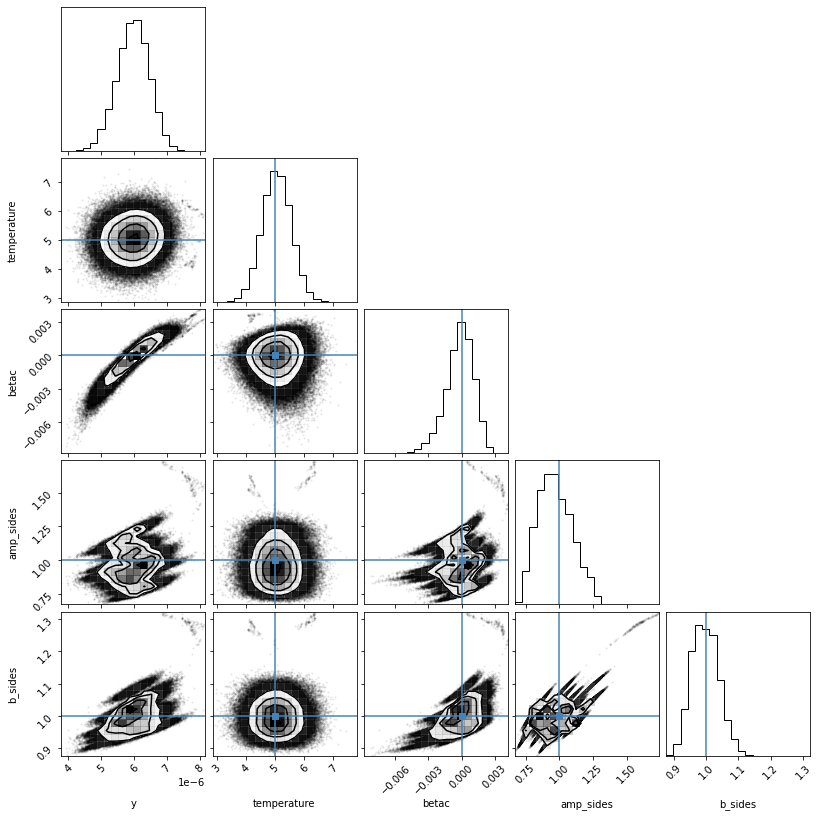

In [11]:
#Plot contour plot
fig = corner.corner(
    new_data[:,:], labels=labels, truths=theta, smooth = 0
);

In [17]:
np.std(new_data[:,2]*3e5)

386.9943865255338

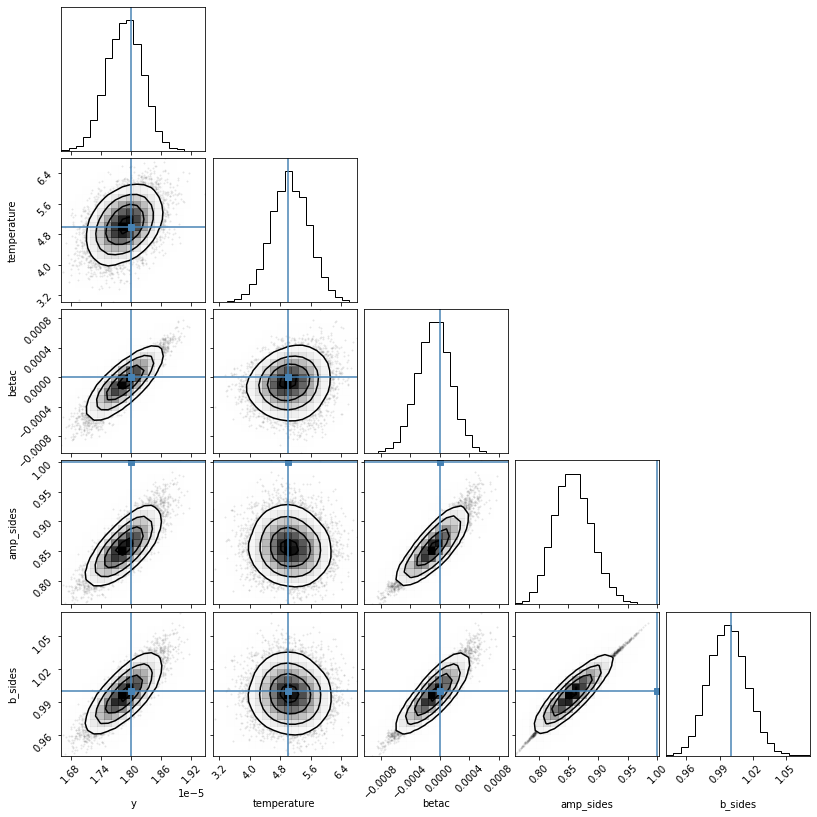

In [18]:
#Plot contour plot
i=15
fig = corner.corner(
    data[8000*i+1:8000*(i+1)+1,:], labels=labels, truths=theta, smooth = 1
);

In [6]:
np.std(data[:,2])*3e5

54.007983016739445

In [42]:
new_data = []
data[1:,2]
for i in range(len(data[1:,2])):
    if data[i+1,2] > -0.04 and data[i+1,2] < 0.04:
        new_data.append(data[i+1,2])
new_data = np.asarray(new_data)
np.std(new_data)*3e5

174.8522142114031

In [8]:
np.std(data[1:,0])

1.966132469794406e-06